<a href="https://colab.research.google.com/github/rhshovon102/DataMining-MachineLearning/blob/main/SentimentAnalysisBasedOnTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset Link](https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset)

In [1]:
import pandas as pd
df = pd.read_csv('/content/Twitter_Data.csv')

In [2]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [3]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [4]:
df.dropna(inplace = True)

In [5]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

In [6]:
df.category = df.category.astype(int)

In [7]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [8]:
df.drop_duplicates(inplace=True)

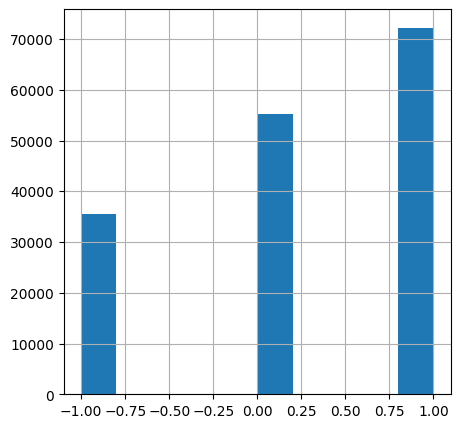

In [9]:
import matplotlib.pyplot as plt
df.category.hist(figsize=(5, 5))
plt.show()

In [10]:
df.category.value_counts()

 1    72249
 0    55211
-1    35509
Name: category, dtype: int64

In [11]:
x = df.clean_text
y = df.category

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [12]:
x[0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9234214886175369

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8142909737988587

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

ab = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', AdaBoostClassifier())
])

ab.fit(x_train,y_train)
ab.score(x_test,y_test)

0.7160520341167086

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

gb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', GradientBoostingClassifier())
])

gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.7529606676075351

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

bc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', BaggingClassifier())
])

bc.fit(x_train,y_train)
bc.score(x_test,y_test)

0.8800699515248205